In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/day25normalization/wine_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/day25normalization/wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [4]:
df.head(5)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

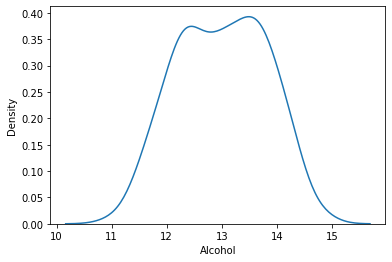

In [5]:
sns.kdeplot(df["Alcohol"])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

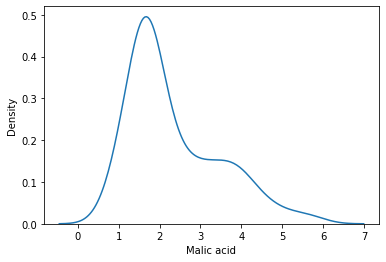

In [6]:
sns.kdeplot(df["Malic acid"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

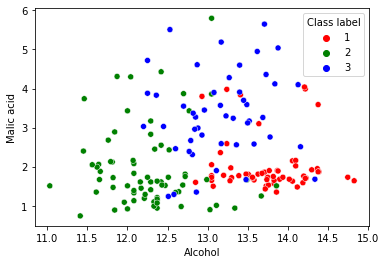

In [7]:
sns.scatterplot(df["Alcohol"],df["Malic acid"],hue=df["Class label"],palette={1:"red",2:"green",3:"blue"})

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("Class label",axis=1),
                                                  df["Class label"],
                                              test_size=0.3,
                                              random_state=0)

In [9]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
np.round(X_train_scaled.describe())

,Alcohol,Malic acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


In [13]:
np.round(X_train.describe())

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


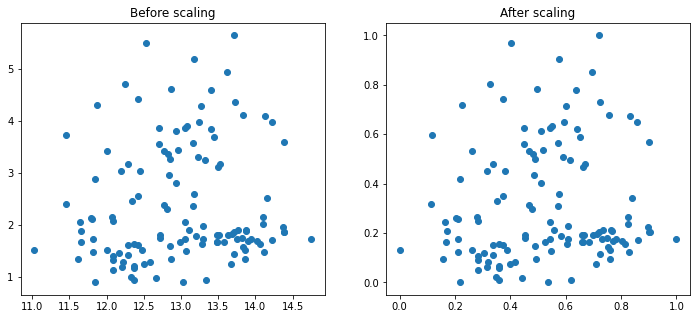

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
ax1.scatter(X_train["Alcohol"],X_train["Malic acid"])

ax2.set_title("After scaling")
ax2.scatter(X_train_scaled["Alcohol"],X_train_scaled["Malic acid"])
plt.show()

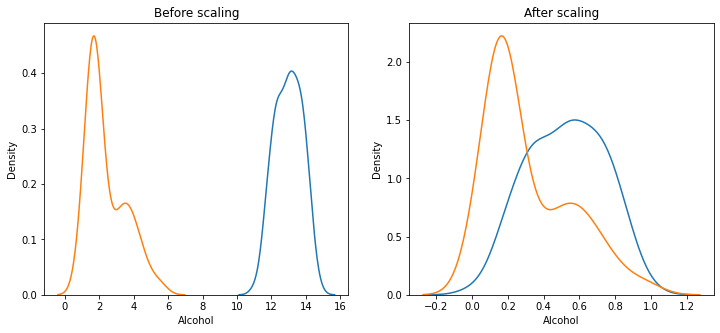

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train["Malic acid"],ax=ax1)

ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(X_train_scaled["Malic acid"],ax=ax2)
plt.show()

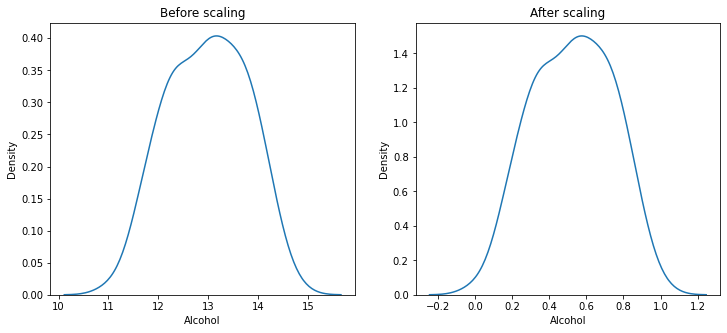

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.kdeplot(X_train["Alcohol"],ax=ax1)


ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)

plt.show()

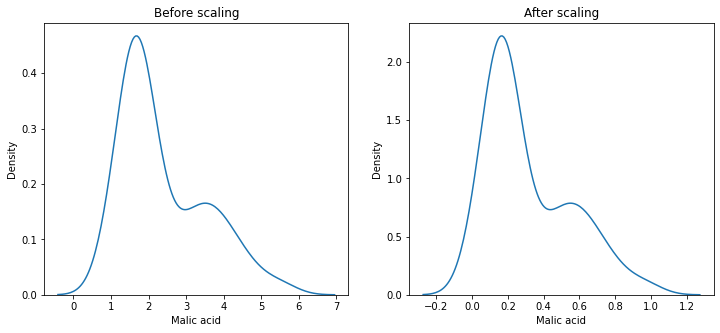

In [17]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.kdeplot(X_train["Malic acid"],ax=ax1)

ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled["Malic acid"],ax=ax2)
plt.show()